## 광주광역시, 183148
## 데이터 전처리
1. 필요없는 컬럼 빼기
2. region_sub 컬럼 원핫인코딩 형식 수정
3. 컬럼별 상관관계 파악 컬럼 제거
4. price_cat 컬럼 추가

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

region_name = 'gj_region'

In [2]:
readD = pd.read_csv(f'region-data-files/{region_name}.csv')
readD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183148 entries, 0 to 183147
Columns: 105 entries, region to all_loan
dtypes: float64(72), int64(26), object(7)
memory usage: 146.7+ MB


In [3]:
all_col = {
    'region', 'region_sub', 'apt_name', 'apt_size', 'apt_floor', 'contract_date', 'contract_price',
    'completion_year', 'period_completed', 'pyung', 'price_per_pyung', 'contract_year', 'value_year',
    'value_factor', 'price_per_pyung_present', 'contract_date_key', 'index',  'date_ym', 'kospi',
    'kospi200', 'kospi200construct', 'kosdaq', 'dowjones', 's&p500', 'shanghai', 'nikkei',
    'exchange_rate', 'gold', 'oil', 'export', 'import', 'cpi_living', 'cpi', 'ccsi',
    'loan_interest_rate', 'housing_loan_rate',
    
    'gw_ratio', 'gg_ratio', 'gsn_ratio', 'gsb_ratio', 'gj_ratio', 'dg_ratio', 'dj_ratio',
    'bs_ratio', 'so_ratio', 'sj_ratio', 'us_ratio', 'ic_ratio', 'jrn_ratio', 'jrb_ratio',
    'jj_ratio', 'ccn_ratio', 'ccb_ratio', 'all_ratio',
    
    'gw_pop', 'gg_pop', 'gsn_pop', 'gsb_pop', 'gj_pop', 'dg_pop', 'dj_pop', 'bs_pop',
    'so_pop', 'sj_pop', 'us_pop', 'ic_pop', 'jrn_pop', 'jrb_pop', 'jj_pop', 'ccn_pop', 'ccb_pop',
    
    'all_re_ccsi', 'so_re_ccsi', 'ic_re_ccsi', 'gg_re_ccsi', 'bs_re_ccsi', 'dg_re_ccsi',
    'gj_re_ccsi', 'dj_re_ccsi', 'us_re_ccsi', 'gw_re_ccsi', 'ccb_re_ccsi', 'ccn_re_ccsi',
    'jrb_re_ccsi', 'jrn_re_ccsi', 'gsb_re_ccsi', 'gsn_re_ccsi',
    
    'gw_loan', 'gg_loan', 'gsn_loan', 'gsb_loan', 'gj_loan', 'dg_loan', 'dj_loan',
    'bs_loan', 'so_loan', 'sj_loan', 'us_loan', 'ic_loan', 'jrn_loan', 'jrb_loan',
    'jj_loan', 'ccn_loan', 'ccb_loan', 'all_loan'
}

In [4]:
drop_col_1 = {
    'region', 'apt_name', 'apt_size', 'contract_date', 'contract_price',
    'completion_year', 'price_per_pyung', 'contract_year', 'value_year',
    'value_factor', 'contract_date_key', 'index', 'date_ym', 'kospi',
    's&p500', 'nikkei', 'cpi', 'ccsi', 'housing_loan_rate',
    
    'gw_ratio', 'gg_ratio', 'gsn_ratio', 'gsb_ratio', 'gj_ratio', 'dg_ratio', 'dj_ratio',
    'bs_ratio', 'so_ratio', 'sj_ratio', 'us_ratio', 'ic_ratio', 'jrn_ratio', 'jrb_ratio',
    'jj_ratio', 'ccn_ratio', 'ccb_ratio', 'all_ratio',
    
    'gw_pop', 'gg_pop', 'gsn_pop', 'gsb_pop', 'dg_pop', 'dj_pop', 'bs_pop',
    'so_pop', 'sj_pop', 'us_pop', 'ic_pop', 'jj_pop', 'ccn_pop', 'ccb_pop',
    
    'all_re_ccsi', 'so_re_ccsi', 'ic_re_ccsi', 'gg_re_ccsi', 'bs_re_ccsi', 'dg_re_ccsi',
    'dj_re_ccsi', 'us_re_ccsi', 'gw_re_ccsi', 'ccb_re_ccsi', 'ccn_re_ccsi',
    'jrb_re_ccsi', 'jrn_re_ccsi', 'gsb_re_ccsi', 'gsn_re_ccsi',
    
    'gw_loan', 'gg_loan', 'gsn_loan', 'gsb_loan', 'dg_loan', 'dj_loan',
    'bs_loan', 'so_loan', 'sj_loan', 'us_loan', 'ic_loan', 'jrn_loan', 'jrb_loan',
    'jj_loan', 'ccn_loan', 'ccb_loan', 'all_loan'
}

In [5]:
preD = readD.drop(columns=drop_col_1)
preD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183148 entries, 0 to 183147
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               183148 non-null  object 
 1   apt_floor                183148 non-null  int64  
 2   period_completed         183148 non-null  int64  
 3   pyung                    183148 non-null  float64
 4   price_per_pyung_present  183148 non-null  float64
 5   kospi200                 183148 non-null  float64
 6   kospi200construct        183148 non-null  float64
 7   kosdaq                   183148 non-null  float64
 8   dowjones                 183148 non-null  float64
 9   shanghai                 183148 non-null  float64
 10  exchange_rate            183148 non-null  float64
 11  gold                     183148 non-null  float64
 12  oil                      183148 non-null  float64
 13  export                   183148 non-null  int64  
 14  impo

In [6]:
# test = preD['region_sub'].str.split(expand=True)[0]
# test.value_counts()

preD['region_sub'] = preD['region_sub'].str.split(expand=True)[0]
preD['region_sub'].value_counts()

북구     55803
광산구    55753
서구     39349
남구     25174
동구      7069
Name: region_sub, dtype: int64

In [9]:
# drop_col_2 = {
#     'gsb_pop'
# }

# preD.drop(columns=drop_col_2, inplace=True)
# preD.info()

In [10]:
corr_matrix = preD.corr()
corr_matrix["price_per_pyung_present"].sort_values(ascending=False)

price_per_pyung_present    1.000000
gj_loan                    0.337528
dowjones                   0.321503
cpi_living                 0.306391
kosdaq                     0.238294
pyung                      0.220539
apt_floor                  0.210986
exchange_rate              0.198354
shanghai                   0.181109
kospi200                   0.165855
gold                       0.001563
export                    -0.032078
import                    -0.057853
gj_re_ccsi                -0.191183
oil                       -0.247033
gj_pop                    -0.270037
loan_interest_rate        -0.271341
jrn_pop                   -0.286549
jrb_pop                   -0.298323
kospi200construct         -0.307738
period_completed          -0.575664
Name: price_per_pyung_present, dtype: float64

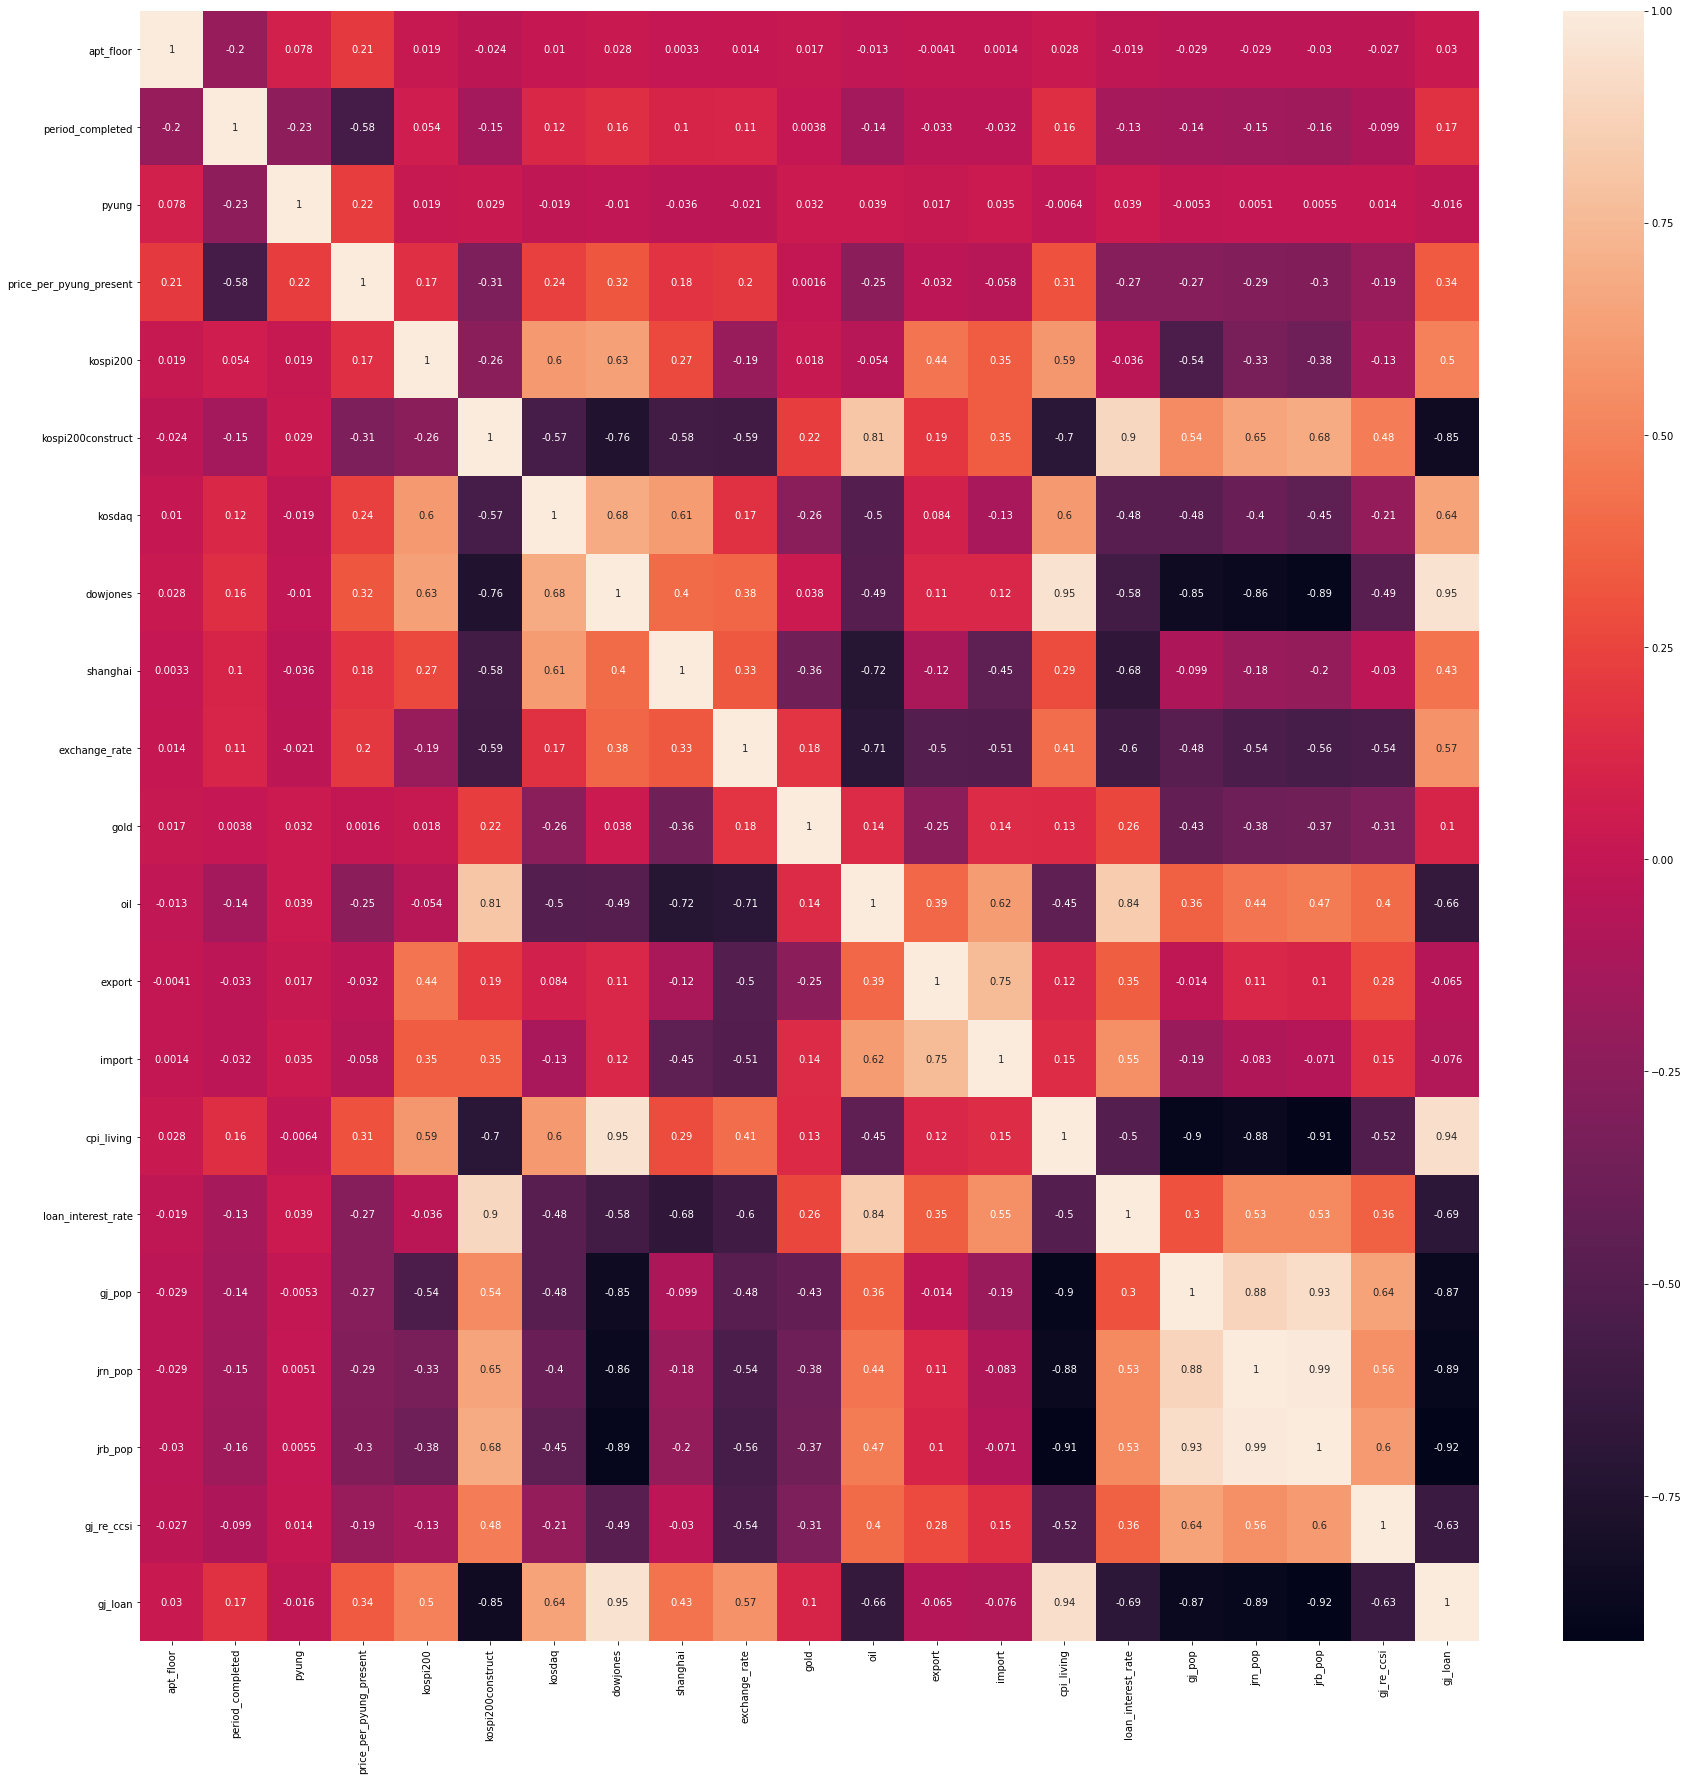

In [11]:
import seaborn as sns

plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True)
plt.show()


count    1.831480e+05
mean     8.376135e+06
std      3.085209e+06
min      1.092821e+06
25%      6.251742e+06
50%      7.707559e+06
75%      9.814216e+06
max      4.328177e+07
Name: price_per_pyung_present, dtype: float64


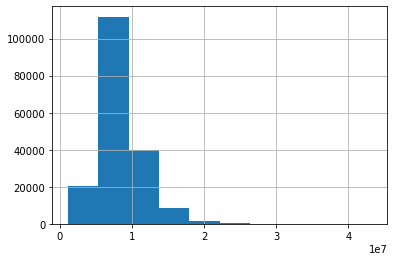

In [12]:
print(preD['price_per_pyung_present'].describe())

preD['price_per_pyung_present'].hist()
plt.show()

In [13]:
preD['price_cat'] = preD['price_per_pyung_present'] / 1.092821e+06  # min
print(preD['price_cat'].describe())

count    183148.000000
mean          7.664690
std           2.823161
min           1.000000
25%           5.720737
50%           7.052902
75%           8.980625
max          39.605544
Name: price_cat, dtype: float64


In [14]:
def calc_price_categorize(D):

    if D['price_cat'] < 5.720737 : # 25%
        D['price_cat'] = 1.0
    elif D['price_cat'] < 7.052902 : # 50%
        D['price_cat'] = 2.0
    elif D['price_cat'] < 8.980625 : # 75%
        D['price_cat'] = 3.0
    else:
        D['price_cat'] = 4.0

    return D
    
preD = preD.apply(calc_price_categorize, axis=1)
preD['price_cat'].value_counts()

4.0    45787
3.0    45787
2.0    45787
1.0    45787
Name: price_cat, dtype: int64

In [15]:
preD.to_csv(f'region-ml-data-files/{region_name}.csv', index=False, encoding='utf-8-sig')

## 기계 학습
1. price_cat 분포별 데이터 나누기
2. train_set, test_set 나누기
3. 스케일 조정
4. 모델별 학습, 테스트
5. 모델 최적화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

region_name = 'gj_region'

In [2]:
readD = pd.read_csv(f'region-ml-data-files/{region_name}.csv')
readD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183148 entries, 0 to 183147
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   region_sub               183148 non-null  object 
 1   apt_floor                183148 non-null  int64  
 2   period_completed         183148 non-null  int64  
 3   pyung                    183148 non-null  float64
 4   price_per_pyung_present  183148 non-null  float64
 5   kospi200                 183148 non-null  float64
 6   kospi200construct        183148 non-null  float64
 7   kosdaq                   183148 non-null  float64
 8   dowjones                 183148 non-null  float64
 9   shanghai                 183148 non-null  float64
 10  exchange_rate            183148 non-null  float64
 11  gold                     183148 non-null  float64
 12  oil                      183148 non-null  float64
 13  export                   183148 non-null  int64  
 14  impo

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_idx, test_idx in split.split(readD, readD["price_cat"]): # readD['price_cat'] 분포 유지
    train_set = readD.loc[train_idx]
    test_set = readD.loc[test_idx]

In [4]:
train_set['price_cat'].value_counts() / len(train_set)

4.0    0.250002
2.0    0.250002
1.0    0.250002
3.0    0.249994
Name: price_cat, dtype: float64

In [5]:
for set_ in (train_set, test_set):
    set_.drop('price_cat', axis=1, inplace=True)

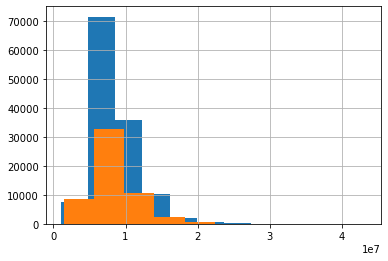

In [6]:
train_set['price_per_pyung_present'].hist()
test_set['price_per_pyung_present'].hist()
plt.show()

In [7]:
x_train = train_set.drop('price_per_pyung_present', axis=1)
y_train = train_set['price_per_pyung_present'].copy()
x_test =  test_set.drop('price_per_pyung_present', axis=1)
y_test = test_set['price_per_pyung_present'].copy()

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, x, y=None):
        return self
    
    def transform(self, x):
        return x[self.attribute_names].values

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor

num_pipe = Pipeline([
        ('selector', DataFrameSelector(list(x_train)[1:])),
        ('std_scaler', StandardScaler())
    ])

cat_pipe = Pipeline([
        ('selector', DataFrameSelector(['region_sub'])),
        ('cat_encoder', OneHotEncoder(sparse=False))
    ])

prepro_pipe = FeatureUnion([
        ("num_pipe", num_pipe),
        ("cat_pipe", cat_pipe)
    ])

full_pipe = Pipeline([
        ('prepro', prepro_pipe),
        ("gbr", GradientBoostingRegressor())
    ])

x_train_nor = prepro_pipe.fit_transform(x_train)
# x_test_nor = prepro_pipe.fit_transform(x_test)


In [10]:
x_train_nor[1, :]


array([-1.38605812,  0.20207864, -1.19562399, -0.39784878,  0.78518125,
       -1.0778795 , -0.72841909, -1.45432275, -2.14989355, -0.03381392,
        1.81905609,  0.51547992,  0.48019586, -0.68314759,  0.63777387,
        1.08885557,  0.63626356,  0.79968539, -0.59269926, -0.98909244,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ])

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'gbr__n_estimators': [900],
              'gbr__max_depth': [8]}

grid = GridSearchCV(full_pipe, param_grid=param_grid, cv=3)
grid.fit(x_train, y_train)

print("최상의 교차 검증 정확도: ", grid.best_score_)
print("테스트 세트 점수: ", grid.score(x_test, y_test))
print("최적의 매개변수: {}".format(grid.best_params_))

최상의 교차 검증 정확도:  0.8868402283882095
테스트 세트 점수:  0.8985041236832356
최적의 매개변수: {'gbr__max_depth': 8, 'gbr__n_estimators': 900}


In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

test_pred = grid.predict(x_test)
grid_mse = mean_squared_error(y_test, test_pred)
grid_rmse = np.sqrt(grid_mse)
print('grid rmse: ', grid_rmse)

grid_mae = mean_absolute_error(y_test, test_pred)
print('grid mae: ', grid_mae)

grid rmse:  44844.989279185604
grid mae:  26104.31972593132


In [26]:
grid.cv_results_

{'mean_fit_time': array([243.70260803, 315.68090304]),
 'std_fit_time': array([1.0703679 , 1.82047774]),
 'mean_score_time': array([0.6096952 , 0.91355642]),
 'std_score_time': array([0.02280523, 0.0135517 ]),
 'param_gbr__max_depth': masked_array(data=[6, 8],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_gbr__n_estimators': masked_array(data=[600, 600],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'gbr__max_depth': 6, 'gbr__n_estimators': 600},
  {'gbr__max_depth': 8, 'gbr__n_estimators': 600}],
 'split0_test_score': array([0.9998094 , 0.99977323]),
 'split1_test_score': array([0.99980143, 0.99975236]),
 'split2_test_score': array([0.99972694, 0.99963643]),
 'mean_test_score': array([0.99977926, 0.99972067]),
 'std_test_score': array([3.71361290e-05, 6.01743329e-05]),
 'rank_test_score': array([1, 2])}

In [27]:
final_model = grid.best_estimator_
final_model

Pipeline(steps=[('prepro',
                 FeatureUnion(transformer_list=[('num_pipe',
                                                 Pipeline(steps=[('selector',
                                                                  DataFrameSelector(attribute_names=['apt_floor',
                                                                                                     'period_completed',
                                                                                                     'pyung',
                                                                                                     'jrn_ratio',
                                                                                                     'jrb_ratio',
                                                                                                     'kospi200',
                                                                                                     'kospi200construct',
                          

In [28]:
import joblib

joblib.dump(final_model, f'models/{region_name}.pkl')


['models/gj_region.pkl']

In [29]:
# test model
import joblib

gw_model = joblib.load(f'models/{region_name}.pkl')

test_pred = gw_model.predict(x_test)
grid_mse = mean_squared_error(y_test, test_pred)
grid_rmse = np.sqrt(grid_mse)
print('grid rmse: ', grid_rmse)

grid rmse:  44844.989279185604
